# Financial Management J Component

## TEAM-10

### V RAGHAV ANAND 19BCE1415

### ANTHRA DEVARAJAN 19BCE1681

### S SABHARI GIRISH 19BCE1759

### NITHISH J V 19BEE1067

### ROHIT DINESH 19BEE1111

## BITCOIN PRICE PREDICTION USING MACHINE LEARNING ALGORITHMS

##### Importing the required libraries for the analysis

In [1]:
from functools import reduce
import pandas as pd
import numpy as np
import pmdarima as pmd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

#### Import the dataset

In [2]:
data=pd.read_csv("Bitcoin.csv")

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### Data preprocessing like clearing the columns that is not needed and finding the correlation between the columns

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-20,55681.792969,57062.148438,53448.046875,56473.031250,56473.031250,67849323955
1,2021-04-21,56471.128906,56757.972656,53695.468750,53906.089844,53906.089844,54926612466
2,2021-04-22,53857.105469,55410.230469,50583.812500,51762.273438,51762.273438,74798630778
3,2021-04-23,51739.808594,52120.792969,47714.664063,51093.652344,51093.652344,86668667320
4,2021-04-24,51143.226563,51167.562500,48805.285156,50050.867188,50050.867188,49014494781
...,...,...,...,...,...,...,...
361,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693
362,2022-04-17,40417.777344,40570.726563,39620.894531,39716.953125,39716.953125,19087633042
363,2022-04-18,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072
364,2022-04-19,40828.175781,41672.960938,40618.632813,41502.750000,41502.750000,25303206547


In [5]:
y=data["Close"]
del data["Date"]

#### Plotting the heatmap for the correlation of the dataset

In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.992602,0.985523,0.979704,0.979704,0.239840
High,0.992602,1.000000,0.984882,0.990655,0.990655,0.270608
Low,0.985523,0.984882,1.000000,0.990554,0.990554,0.145477
Close,0.979704,0.990655,0.990554,1.000000,1.000000,0.208262
Adj Close,0.979704,0.990655,0.990554,1.000000,1.000000,0.208262
Volume,0.239840,0.270608,0.145477,0.208262,0.208262,1.000000


In [7]:
del data["Close"]

#### Dividing the X and Y(Close price) axis

In [8]:
x=data
y=y.to_frame()
y

,Close
0,56473.031250
1,53906.089844
2,51762.273438
3,51093.652344
4,50050.867188
...,...
361,40424.484375
362,39716.953125
363,40826.214844
364,41502.750000


## Visualization of the closing prices of Bitcoin from April 2021 - April 2022 (The below image is visualized using the Tableau tool and imported in Python)

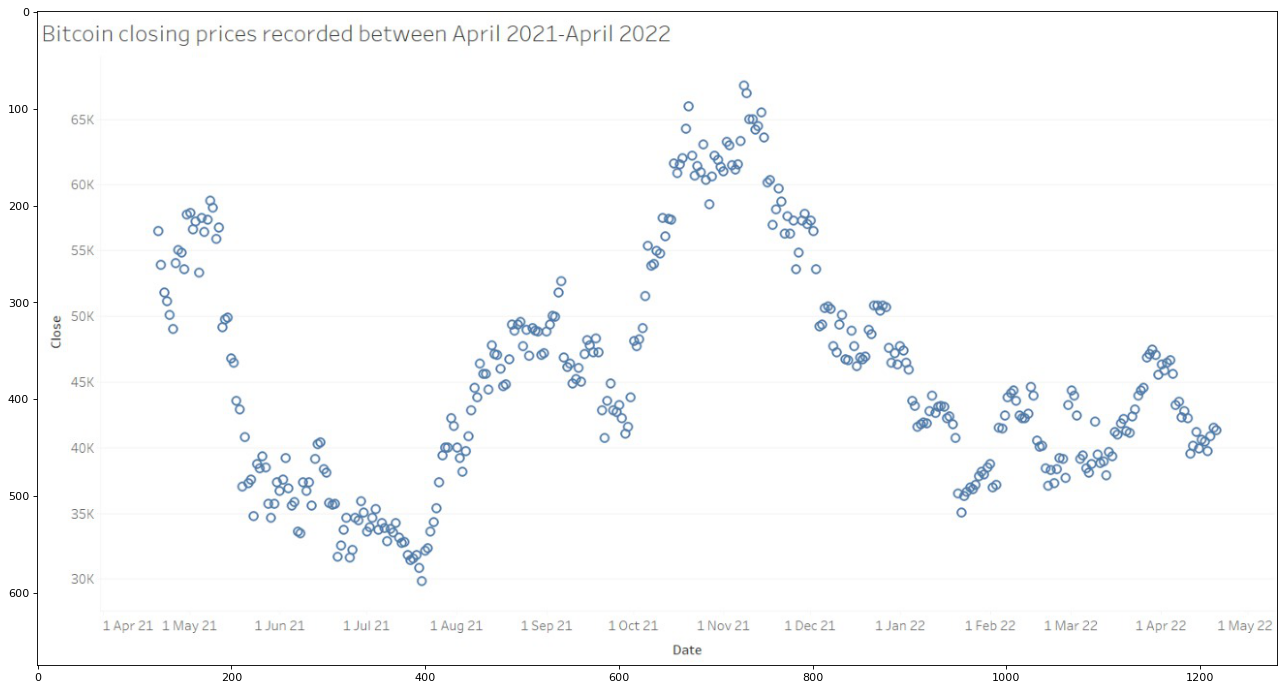

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 40), dpi=80)
img = mpimg.imread('Price vs Year.jpeg')
 
plt.imshow(img)

#### Dividing the test and train split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle = False, stratify = None)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(329, 5) (37, 5) (329, 1) (37, 1)


## 1. Building the linear regression model

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predicting and analysing the difference with the test data

In [12]:
y_pred=model.predict(X_test)
val={
    "Predicted": reduce(lambda z, y :z + y, y_pred.tolist()),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,39338.785156,39338.785156
1,41143.929688,41143.929688
2,40951.378906,40951.378906
3,41801.156250,41801.156250
4,42190.652344,42190.652344
5,41247.824219,41247.824219
6,41077.996094,41077.996094
7,42358.808594,42358.808594
8,42892.957031,42892.957031
9,43960.933594,43960.933594


### Plotting the predicted and actual data

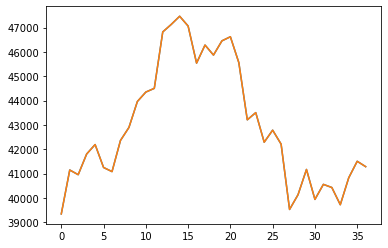

In [13]:
plt.plot(ans["Predicted"])
plt.plot(ans["Actual"])
plt.show()

### Mean absolute error is low

In [14]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

3.3936836140079273e-08

### 2. Building the decision tree regression model

In [15]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting and analysing the difference with the test data

In [16]:
y_pred=regressor.predict(X_test)
val={
    "Predicted": y_pred.tolist(),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,39400.585938,39338.785156
1,40869.554688,41143.929688
2,41034.542969,40951.378906
3,41821.261719,41801.156250
4,42197.515625,42190.652344
5,41626.195313,41247.824219
6,41034.542969,41077.996094
7,42375.632813,42358.808594
8,42909.402344,42892.957031
9,43949.101563,43960.933594


### Plotting the predicted and actual data

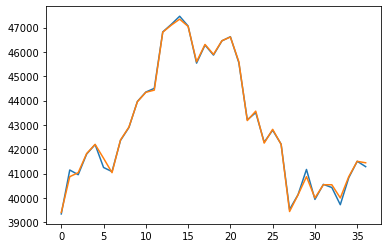

In [17]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### There is a minimal mean absolute error

In [18]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

69.30901616216265

### 3. Building the KNN regression model

In [19]:
neigh = KNeighborsRegressor(n_neighbors=30)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

### Predicting and analysing the difference with the test data

In [20]:
y_pred=neigh.predict(X_test)
val={
    "Predicted": reduce(lambda z, y :z + y, y_pred.tolist()),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,41868.330078,39338.785156
1,47189.765560,41143.929688
2,38589.714714,40951.378906
3,45900.532682,41801.156250
4,38831.392513,42190.652344
5,38787.365300,41247.824219
6,42804.990755,41077.996094
7,47622.347005,42358.808594
8,43788.262630,42892.957031
9,47412.395833,43960.933594


### Plotting the predicted and the actual graph

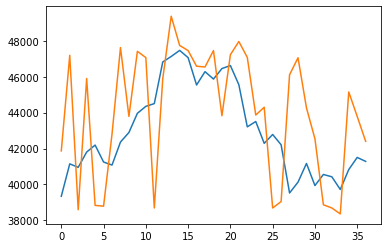

In [21]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### Mean absolute error is high but reasonable since the close price values are arguably large

In [22]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

2657.564931725223

### 4. Building a support vector model for regression

In [23]:
support=svm.SVR()
support.fit(X_train, y_train)

C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

### Predicting and analysing the difference with the test data

In [24]:
y_pred=support.predict(X_test)
val={
    "Predicted": y_pred.tolist(),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,44683.846114,39338.785156
1,44702.728639,41143.929688
2,44681.813646,40951.378906
3,44696.567129,41801.156250
4,44679.570821,42190.652344
5,44679.991502,41247.824219
6,44684.601740,41077.996094
7,44693.546465,42358.808594
8,44685.312033,42892.957031
9,44692.340031,43960.933594


### Plotting the predicted and the actual graph

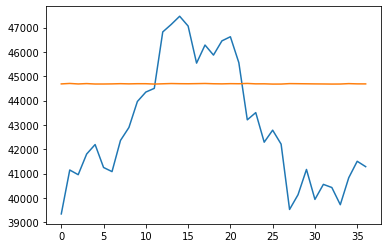

In [25]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### A high mean absolute error is obtained

In [26]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

2690.701666260613

### 5. Building random forest regressor model 

In [27]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

<ipython-input-27-9de6dd0ce04a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

### Predicting and analysing the difference with the test data

In [28]:
y_pred=regressor.predict(X_test)
val={
    "Predicted": y_pred.tolist(),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,39333.161524,39338.785156
1,40961.264688,41143.929688
2,40825.590352,40951.378906
3,41735.312188,41801.156250
4,42210.755977,42190.652344
5,41413.453203,41247.824219
6,40926.951211,41077.996094
7,42378.569688,42358.808594
8,42848.758906,42892.957031
9,43932.695196,43960.933594


### Plotting the predicted and the actual graph

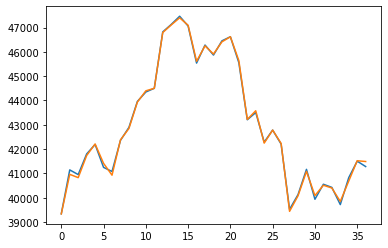

In [29]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### A minimal yet a decent mean absolute error is obtained

In [30]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

63.884005436481246

### Using time series forecasting 
#### Plotting the rolling mean and rolling standard deviation to check if the data set is stationary

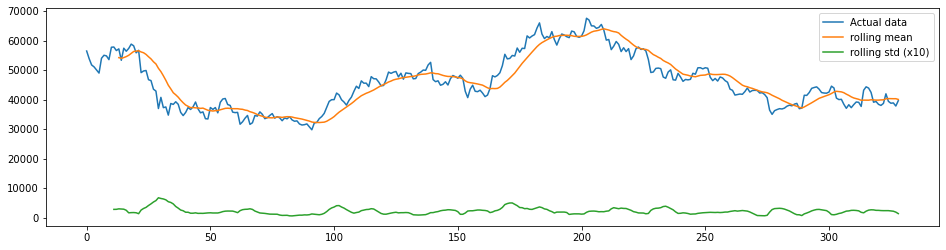

In [31]:
rolmean = y_train.rolling(window=14).mean() 
rolstd = y_train.rolling(window=12).std()

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(y_train, label= "Actual data")
ax.plot(rolmean, label='rolling mean');
ax.plot(rolstd, label='rolling std (x10)');
ax.legend()

#### The above graph shows that the dataset is not stationary
#### Conducting a mathematical test to see if the dataset is stationary

In [32]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y_train.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

Test statistic = -1.935
P-value = 0.316
Critical values :
	1%: -3.4504451681828194 - The data is not stationary with 99% confidence
	5%: -2.870392380216117 - The data is not stationary with 95% confidence
	10%: -2.571486353732897 - The data is not stationary with 90% confidence


#### Using log transformation to make the dataset stationary

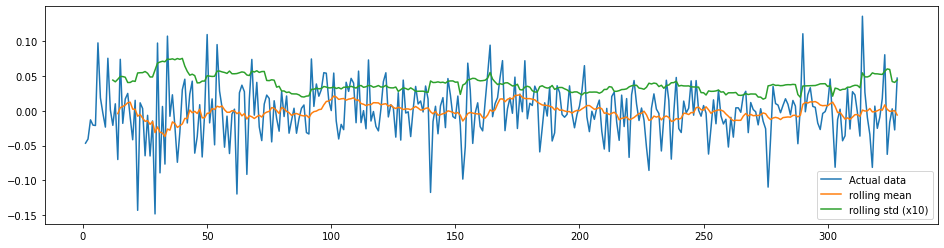

In [33]:
y_detrend= np.log(y_train)
y_detrend = y_detrend - y_detrend.shift(1)
y_detrend.dropna()
y_detest= np.log(y_test)
y_detest = y_detest - y_detest.shift(1)
y_detest.dropna()
rolmean = y_detrend.rolling(window=14).mean() 
rolstd = y_detrend.rolling(window=12).std()

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(y_detrend, label= "Actual data")
ax.plot(rolmean, label='rolling mean');
ax.plot(rolstd, label='rolling std (x10)');
ax.legend()

### Proving that the dataset is stationary

In [34]:
dftest = adfuller(y_detrend.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

Test statistic = -19.051
P-value = 0.000
Critical values :
	1%: -3.45050711373316 - The data is  stationary with 99% confidence
	5%: -2.8704195794076743 - The data is  stationary with 95% confidence
	10%: -2.571500856923753 - The data is  stationary with 90% confidence


#### Finding the best AR(p) and IM(q) value

In [35]:
autoarima_model = pmd.auto_arima(y_train.dropna(), start_p=1, start_q=1,test="adf",trace=True)
autoarima_model

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5846.592, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5847.006, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5846.311, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5846.041, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5845.277, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.129 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

#### Building a forecast model for the actual close price value(Using ARIMA model)

In [36]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAmodel = ARIMA(y_train, order = (0,1,0))
ARIMAmodel = ARIMAmodel.fit()

#### Predicting for the built model

In [37]:
y_pred = ARIMAmodel.get_forecast(len(y_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = y_test.index
y_pred_out = y_pred_df["Predictions"] 
y_pred_out = y_pred_df["Predictions"] 
val={
    "Predicted": y_pred_out.tolist(),
    "Actual": reduce(lambda z, y :z + y, y_test.values.tolist())
}
ans=pd.DataFrame(val)
ans


,Predicted,Actual
0,39666.753906,39338.785156
1,39666.753906,41143.929688
2,39666.753906,40951.378906
3,39666.753906,41801.156250
4,39666.753906,42190.652344
5,39666.753906,41247.824219
6,39666.753906,41077.996094
7,39666.753906,42358.808594
8,39666.753906,42892.957031
9,39666.753906,43960.933594


#### Plotting the graph for predicted and actual

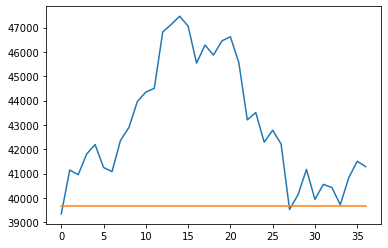

In [38]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### A pretty high mean absolute error is obtained

In [39]:
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

3322.5258660270288

### Building the ARIMA model for the log transformed value(Finding the best p and q value)

In [40]:
autoarima_model = pmd.auto_arima(y_detrend.dropna(), start_p=1, start_q=1,test="adf",trace=True)
autoarima_model

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1177.114, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1180.174, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1179.179, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1179.251, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1181.934, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.357 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Building the model

In [41]:
ARIMAmodel = ARIMA(y_detrend, order = (0,0,0))
ARIMAmodel = ARIMAmodel.fit()

### Predicting for the above built model

In [42]:
y_pred = ARIMAmodel.get_forecast(len(y_detest.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = y_detest.index
y_pred_out = y_pred_df["Predictions"] 
y_pred_out = y_pred_df["Predictions"] 
val={
    "Predicted": y_pred_out.tolist(),
    "Actual": reduce(lambda z, y :z + y, y_detest.values.tolist())
}
ans=pd.DataFrame(val)
ans

,Predicted,Actual
0,-0.001082,NaN
1,-0.001082,0.044865
2,-0.001082,-0.004691
3,-0.001082,0.020539
4,-0.001082,0.009275
5,-0.001082,-0.022600
6,-0.001082,-0.004126
7,-0.001082,0.030704
8,-0.001082,0.012531
9,-0.001082,0.024594


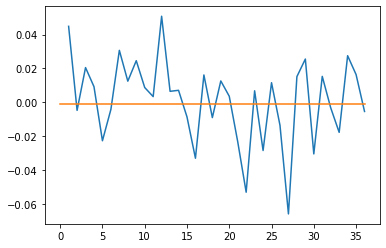

In [43]:
plt.plot(ans["Actual"])
plt.plot(ans["Predicted"])
plt.show()

### An extremely low mean absolute error is obtained 

In [44]:
ans=ans.iloc[1: , :]
mean_absolute_error(ans["Predicted"].values.tolist(), ans["Actual"].values.tolist())

0.01941242642995383